<a href="https://colab.research.google.com/github/Mercymerine/Machine_Learning_1/blob/main/Moore's_law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/chip_dataset.csv')
df.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,6/5/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,10/31/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
2,AMD Athlon 1100,CPU,8/14/00,180,60,120,37,1100.0,NaN,AMD,NaN,NaN,NaN
3,AMD Athlon 1133,CPU,10/31/00,180,63,120,37,1133.0,NaN,AMD,NaN,NaN,NaN
4,AMD Athlon 1200,CPU,10/31/00,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4945 non-null   object 
 1   Type                   4945 non-null   object 
 2   Release Date           4746 non-null   object 
 3   Process Size (nm)      4945 non-null   object 
 4   TDP (W)                4508 non-null   object 
 5   Die Size (mm^2)        4593 non-null   object 
 6   Transistors (million)  4390 non-null   object 
 7   Freq (GHz)             4508 non-null   float64
 8   Foundry                4330 non-null   object 
 9   Vendor                 4945 non-null   object 
 10  FP16 GFLOPS            800 non-null    float64
 11  FP32 GFLOPS            1685 non-null   float64
 12  FP64 GFLOPS            1278 non-null   float64
dtypes: float64(4), object(9)
memory usage: 502.4+ KB


Checking for missing values

In [4]:
missing_percentage = (df.isnull().sum()/len(df)) * 100
print(missing_percentage)

Product                   0.000000
Type                      0.000000
Release Date              4.024267
Process Size (nm)         0.000000
TDP (W)                   8.837209
Die Size (mm^2)           7.118301
Transistors (million)    11.223458
Freq (GHz)                8.837209
Foundry                  12.436805
Vendor                    0.000000
FP16 GFLOPS              83.822042
FP32 GFLOPS              65.925177
FP64 GFLOPS              74.155713
dtype: float64


In [5]:
df.isnull().sum()

Product                     0
Type                        0
Release Date              199
Process Size (nm)           0
TDP (W)                   437
Die Size (mm^2)           352
Transistors (million)     555
Freq (GHz)                437
Foundry                   615
Vendor                      0
FP16 GFLOPS              4145
FP32 GFLOPS              3260
FP64 GFLOPS              3667
dtype: int64

In [6]:
df.columns

Index(['Product', 'Type', 'Release Date', 'Process Size (nm)', 'TDP (W)',
       'Die Size (mm^2)', 'Transistors (million)', 'Freq (GHz)', 'Foundry',
       'Vendor', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'],
      dtype='object')

**Using Missigno**

In [7]:
import missingno as msno

Bar Chart

<Axes: >

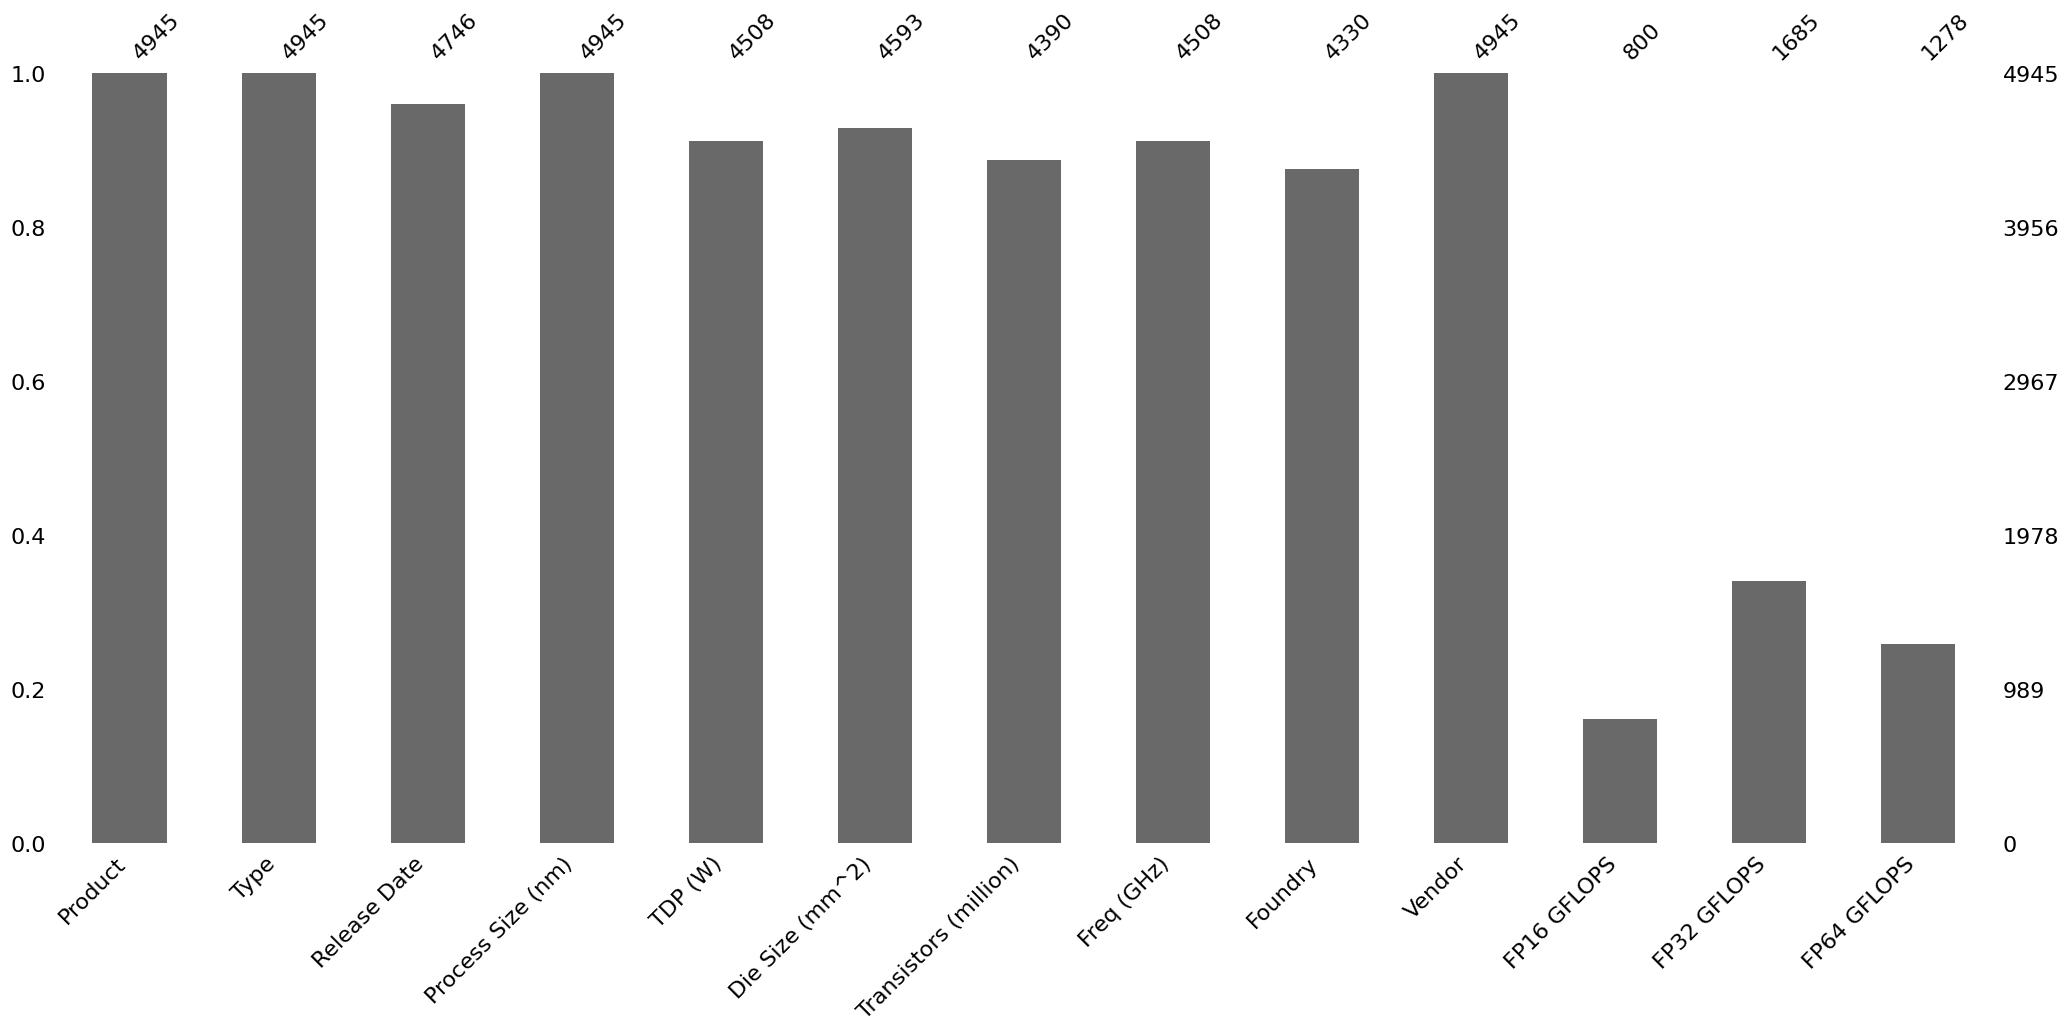

In [8]:
msno.bar(df)

<Axes: >

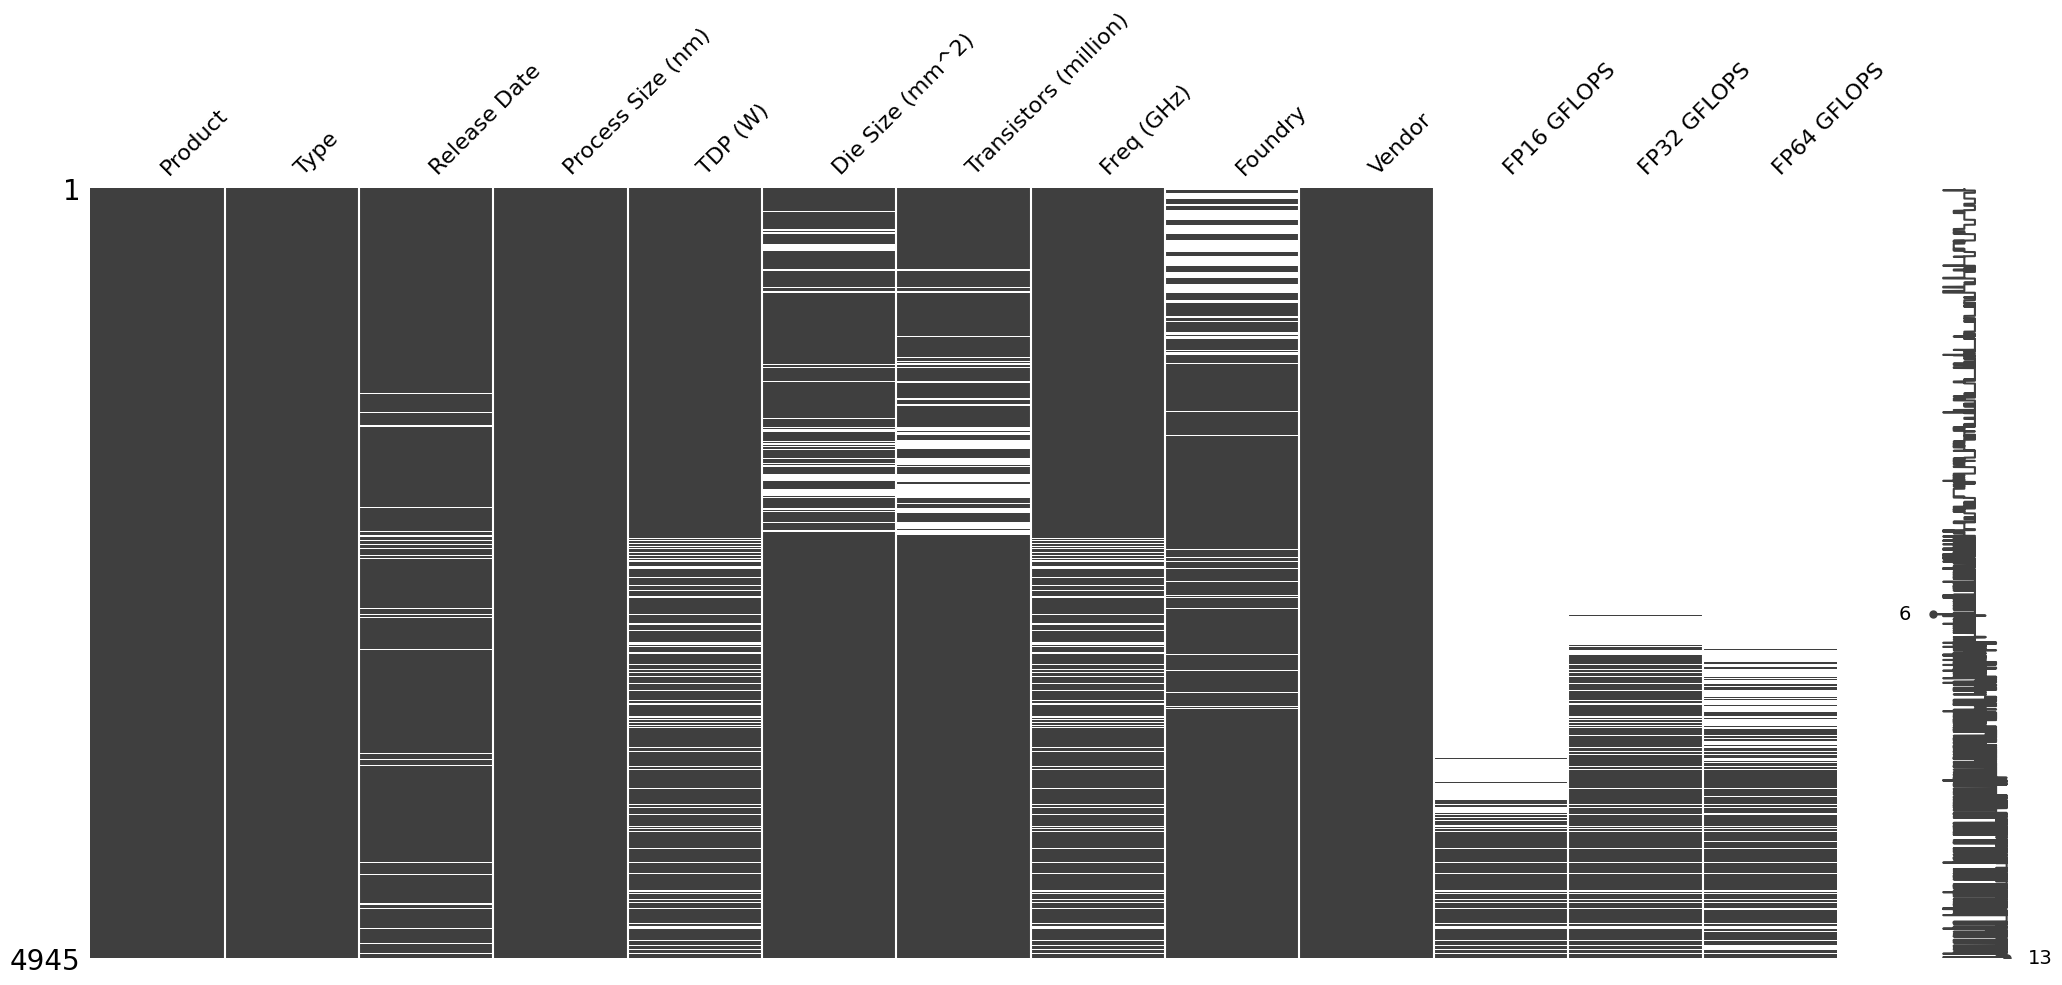

In [9]:
msno.matrix(df)

<Axes: >

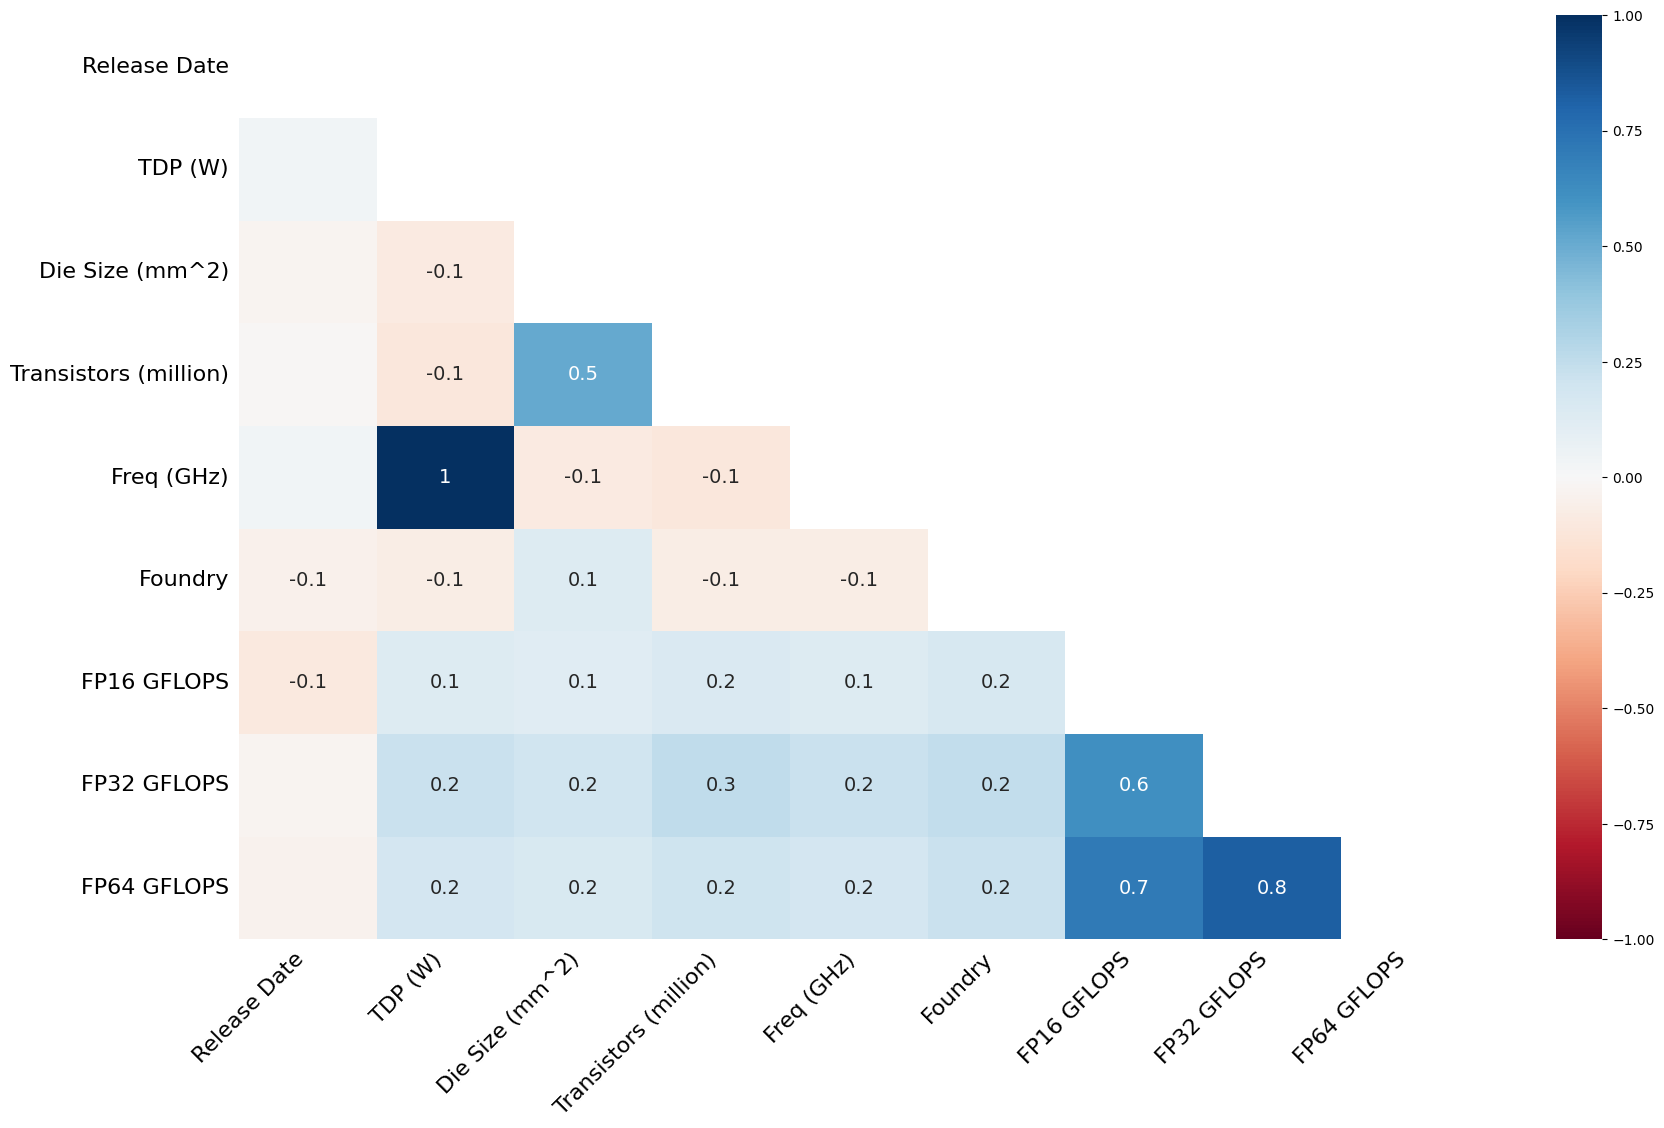

In [10]:
msno.heatmap(df)

<Axes: >

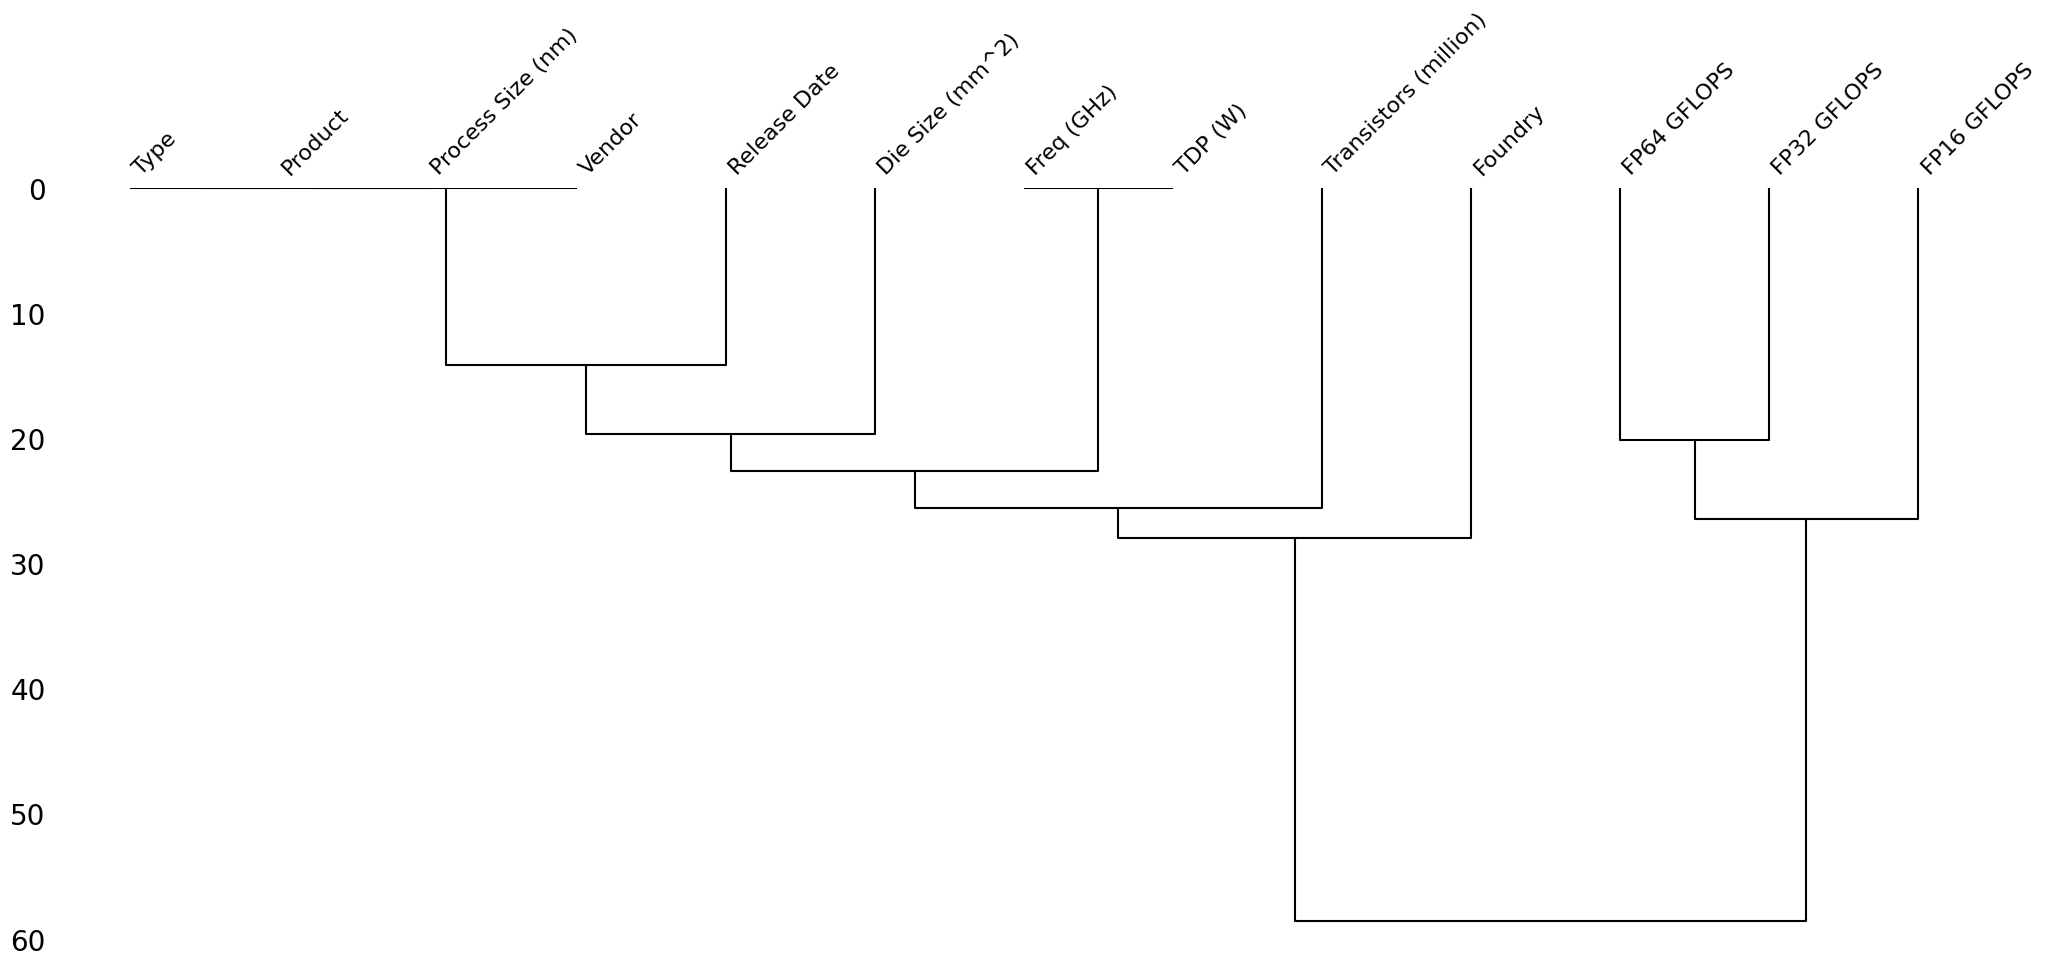

In [11]:
msno.dendrogram(df)

Since the percentage of the following columns is greater than 50% am dropping them:'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'

In [12]:
columns_to_drop = ['FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS']
df.drop(columns=columns_to_drop, inplace= True)

 Changing the dtype of the release date to datetime datatype

In [13]:

df['Release Date'] = pd.to_datetime(df['Release Date'])

<ipython-input-13-5542b5313a54>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])


Performing a forward fill since I have noticed that the dates are following a chronological order and it could be missing completely at random

In [14]:

df['Release Date'].fillna(method='ffill', inplace= True)


Converting these columns to numerical format: 'Process Size (nm)', 'TDP (W)','Die Size (mm^2)', 'Transistors (million) into numerical form

In [15]:
df['Process Size (nm)'].unique()

array(['180', '90', '130', '65', '45', '32', '40', '22', '28', '14', '12',
       '10', '7', '16', '6', '5', '4', '250', '150', '110', '0', '80',
       '55', '14+', '14++', '14+++', '20', '10+', '8'], dtype=object)

In [16]:
import re
def remove_additional_signs(value):
  return re.sub(r'\D', '', value)

df['Process Size (nm)'] = df['Process Size (nm)'].apply(remove_additional_signs)
df['Process Size (nm)'] = pd.to_numeric(df['Process Size (nm)'])


In [17]:
df['Die Size (mm^2)'] = pd.to_numeric(df['Die Size (mm^2)'], errors='coerce')


In [18]:
df['Die Size (mm^2)'] .isnull().sum()

716

In [19]:
df['Transistors (million)'] = pd.to_numeric(df['Transistors (million)'], errors='coerce')


In [20]:
df['TDP (W)'] = pd.to_numeric(df['TDP (W)'], errors='coerce')


In [21]:
df['Freq (GHz)'] = pd.to_numeric(df['Freq (GHz)'], errors='coerce')


I have also noticed the TDP(W), thermal design power and the Freq(GHz) are missing the same number of values in the dataset so I thought it is of the type missing at random.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Product                4945 non-null   object        
 1   Type                   4945 non-null   object        
 2   Release Date           4945 non-null   datetime64[ns]
 3   Process Size (nm)      4945 non-null   int64         
 4   TDP (W)                4054 non-null   float64       
 5   Die Size (mm^2)        4229 non-null   float64       
 6   Transistors (million)  4139 non-null   float64       
 7   Freq (GHz)             4508 non-null   float64       
 8   Foundry                4330 non-null   object        
 9   Vendor                 4945 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 386.5+ KB


In [23]:
missing_in_column1 = df['TDP (W)'].isna()
missing_in_column2 = df['Freq (GHz)'].isna()

missing_same_positions = (missing_in_column1 == missing_in_column2)

all_missing_at_same_positions = missing_same_positions.all()

print("\nMissing values in Column1:")
#print(missing_in_column1)

print("\nMissing values in Column2:")
#print(missing_in_column2)

print("\nComparison of missing values in both columns:")
#print(missing_same_positions)

print(f"\nAre all missing values at the same positions in both columns? {all_missing_at_same_positions}")



Missing values in Column1:

Missing values in Column2:

Comparison of missing values in both columns:

Are all missing values at the same positions in both columns? False


In [24]:

# Identify missing or "unknown" values in both columns
missing_unknown_in_column1 = df['TDP (W)'].isna() | (df['TDP (W)'] == 'unknown')
missing_unknown_in_column2 = df['Freq (GHz)'].isna() | (df['Freq (GHz)'] == 'unknown')

# Check for positions where one column has missing/unknown values but the other does not
missing_unknown_in_either_but_not_both = (missing_unknown_in_column1 != missing_unknown_in_column2)

# Check if there are any such positions
any_missing_unknown_in_either_but_not_both = missing_unknown_in_either_but_not_both.any()

#print("\nMissing/unknown values in 'TDP (W)':")
#print(missing_unknown_in_column1)

#print("\nMissing/unknown values in 'Freq (GHz)':")
#print(missing_unknown_in_column2)

#print("\nPositions where one column has missing/unknown values but the other does not:")
#print(missing_unknown_in_either_but_not_both)

print(f"\nAre there any positions where one column has missing/unknown values but the other does not? {any_missing_unknown_in_either_but_not_both}")



Are there any positions where one column has missing/unknown values but the other does not? True


In [25]:
tdf_freq = df[['TDP (W)','Freq (GHz)']]
tdf_freq

,TDP (W),Freq (GHz)
0,54.0,1000.0
1,54.0,1000.0
2,60.0,1100.0
3,63.0,1133.0
4,66.0,1200.0
...,...,...
4940,80.0,1042.0
4941,220.0,1980.0
4942,285.0,2340.0
4943,320.0,2295.0


<Axes: >

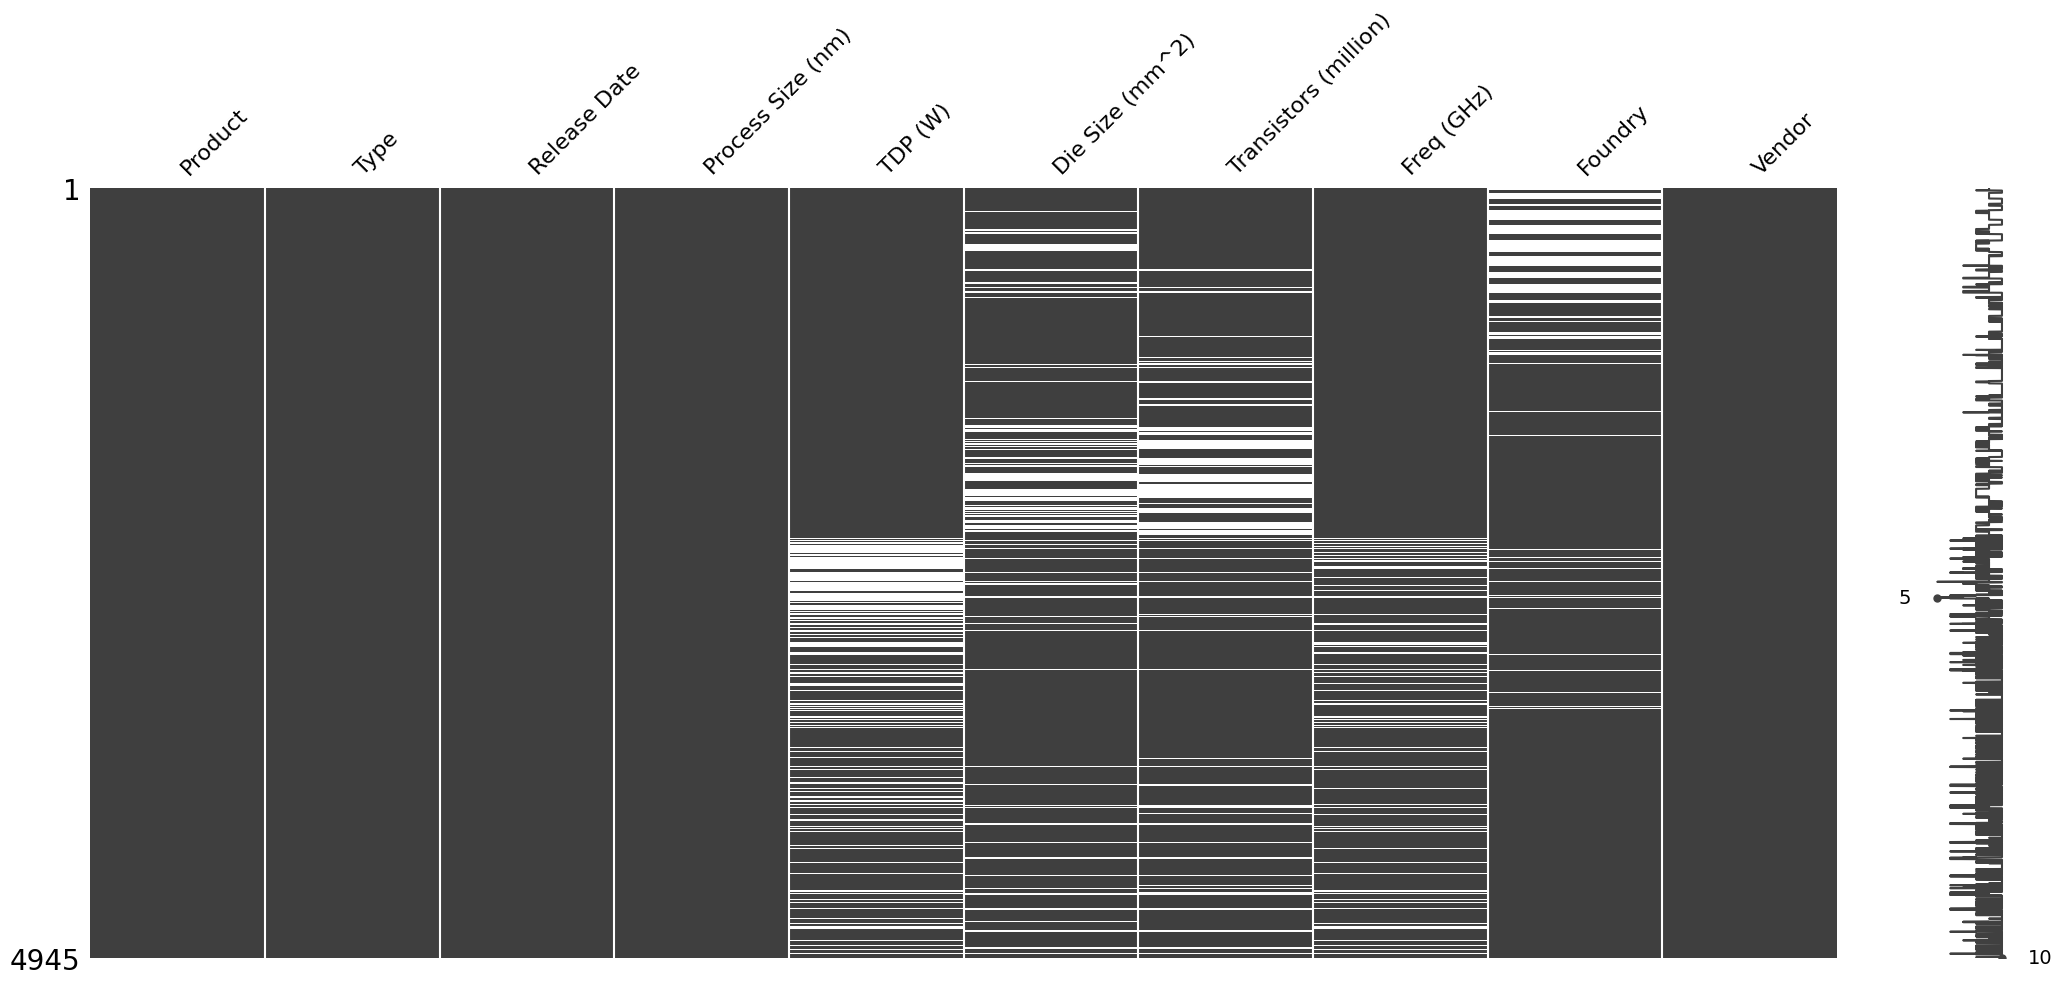

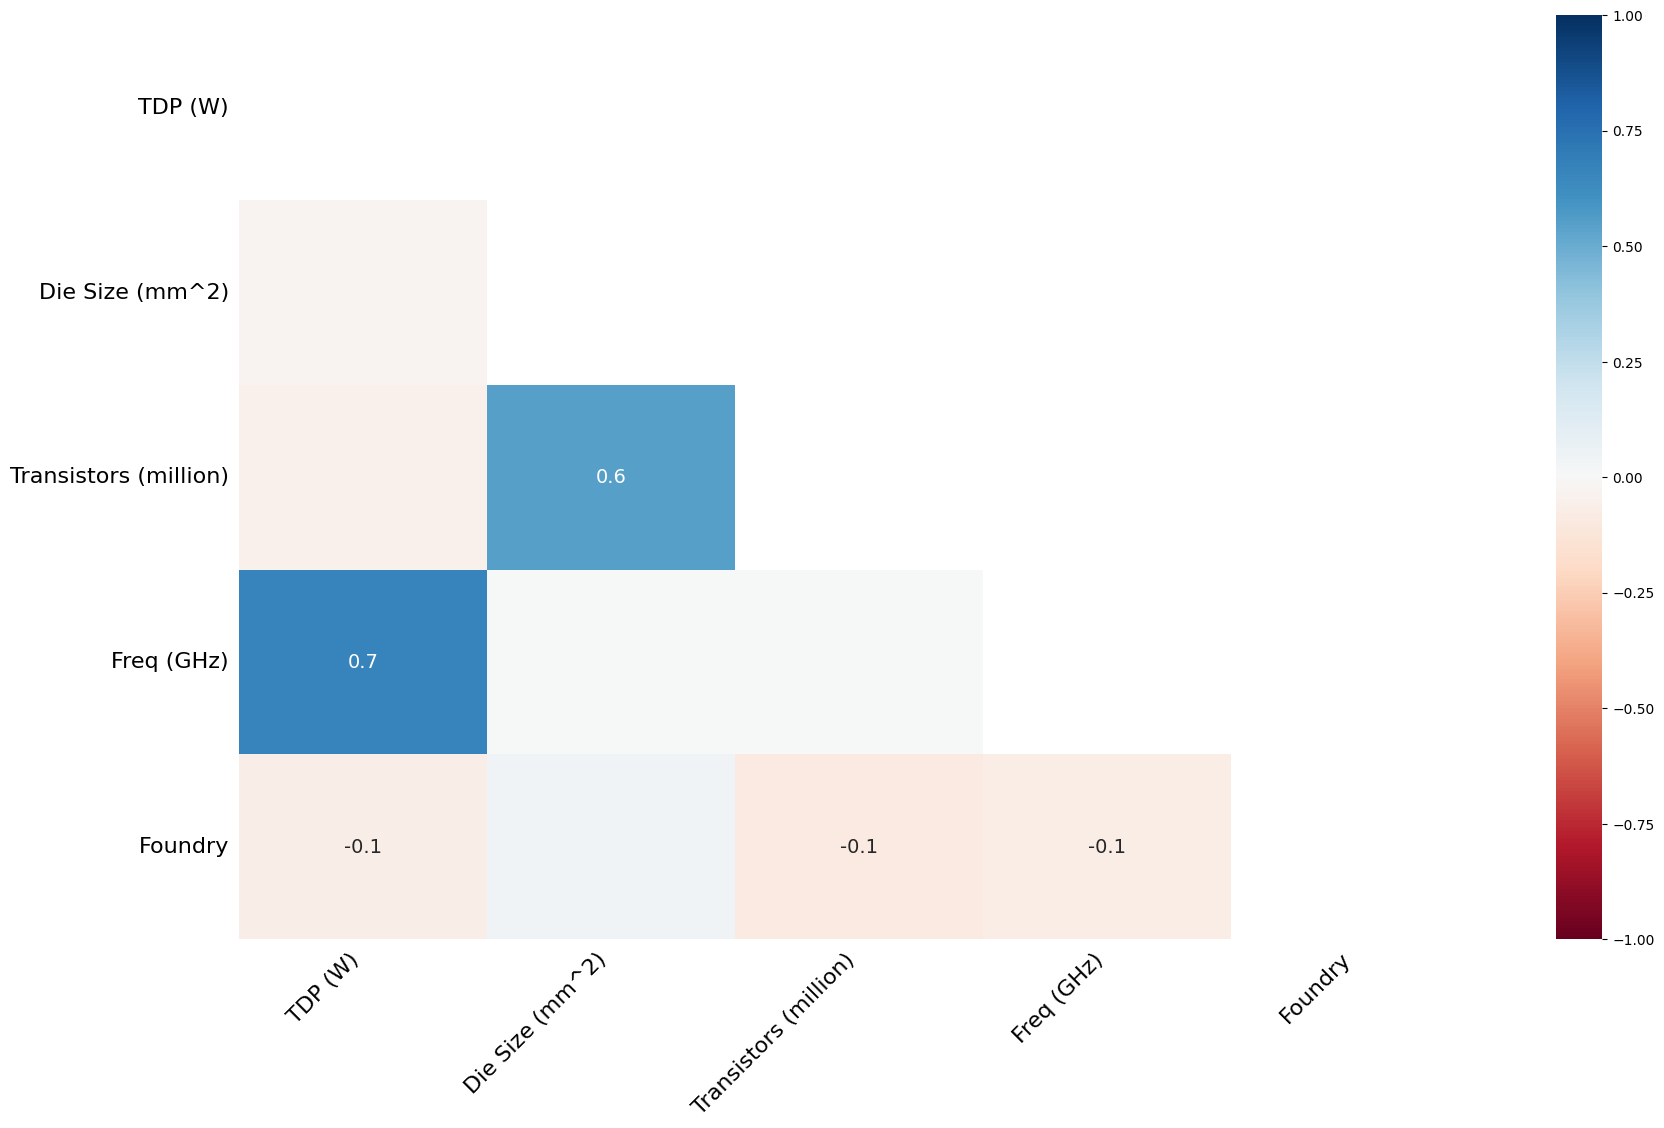

In [26]:
import missingno as msno

msno.matrix(df)
msno.heatmap(df)

<Axes: >

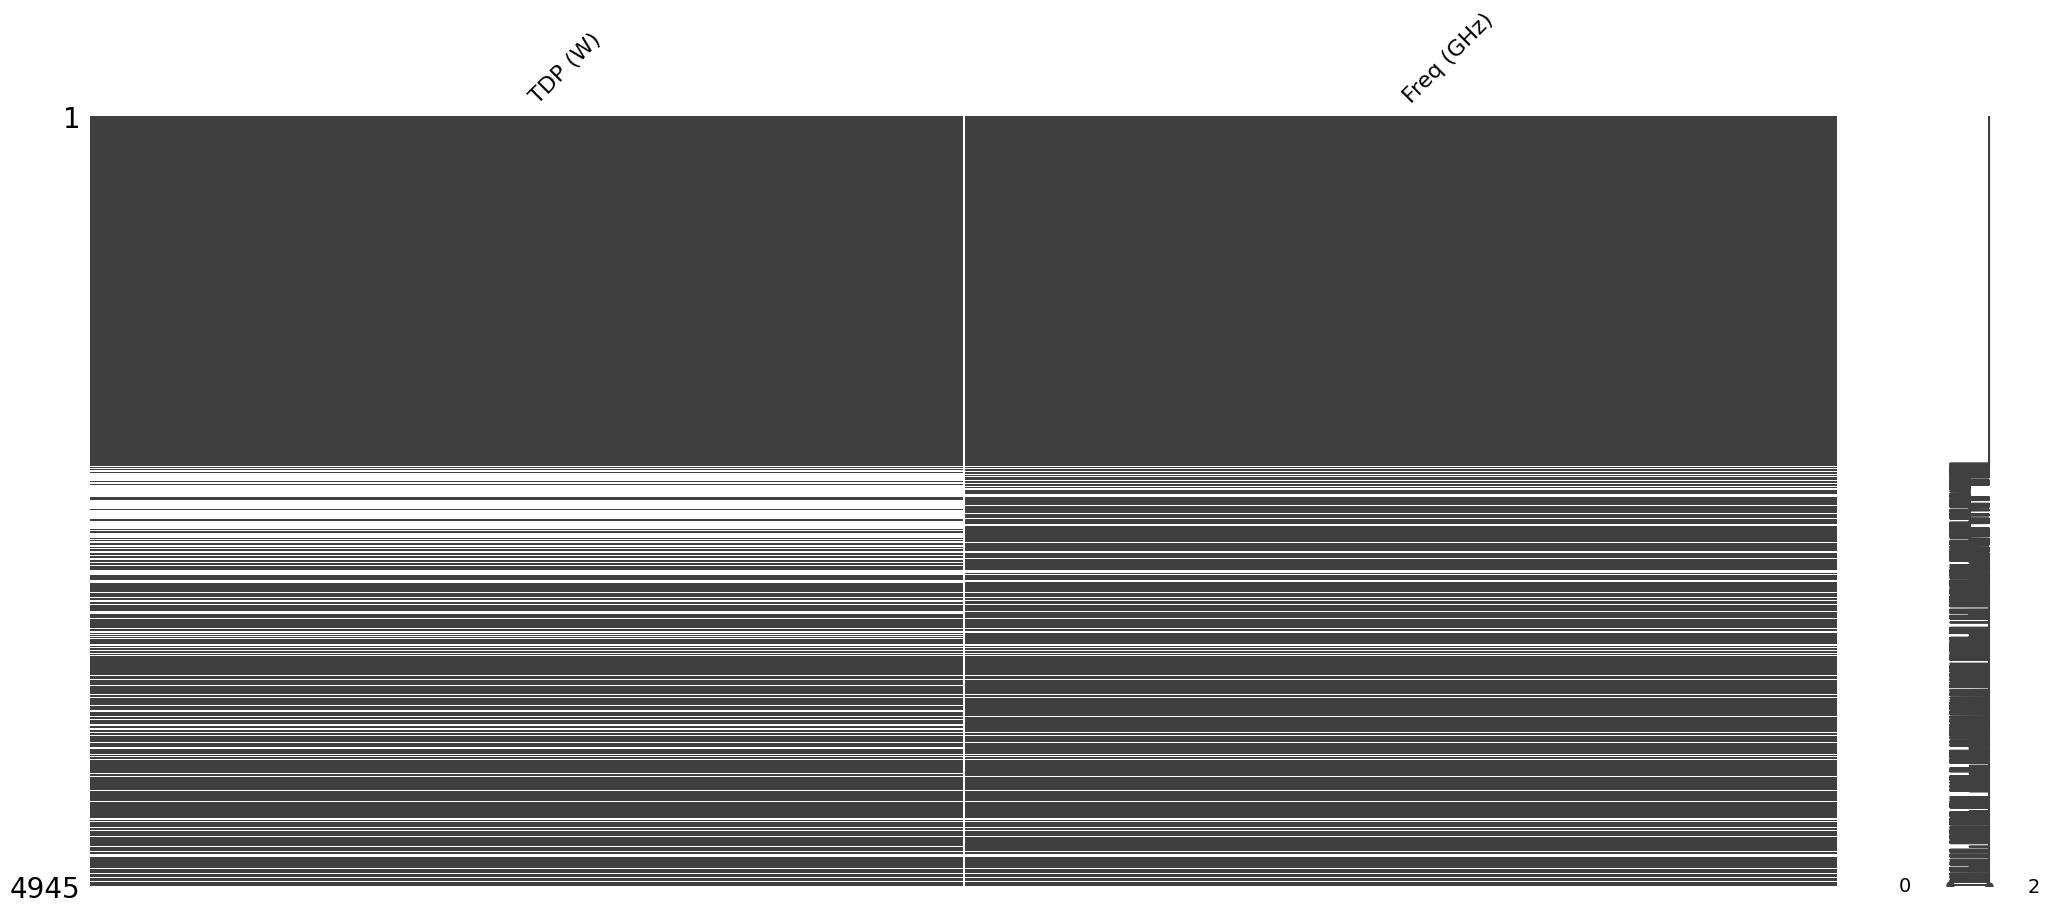

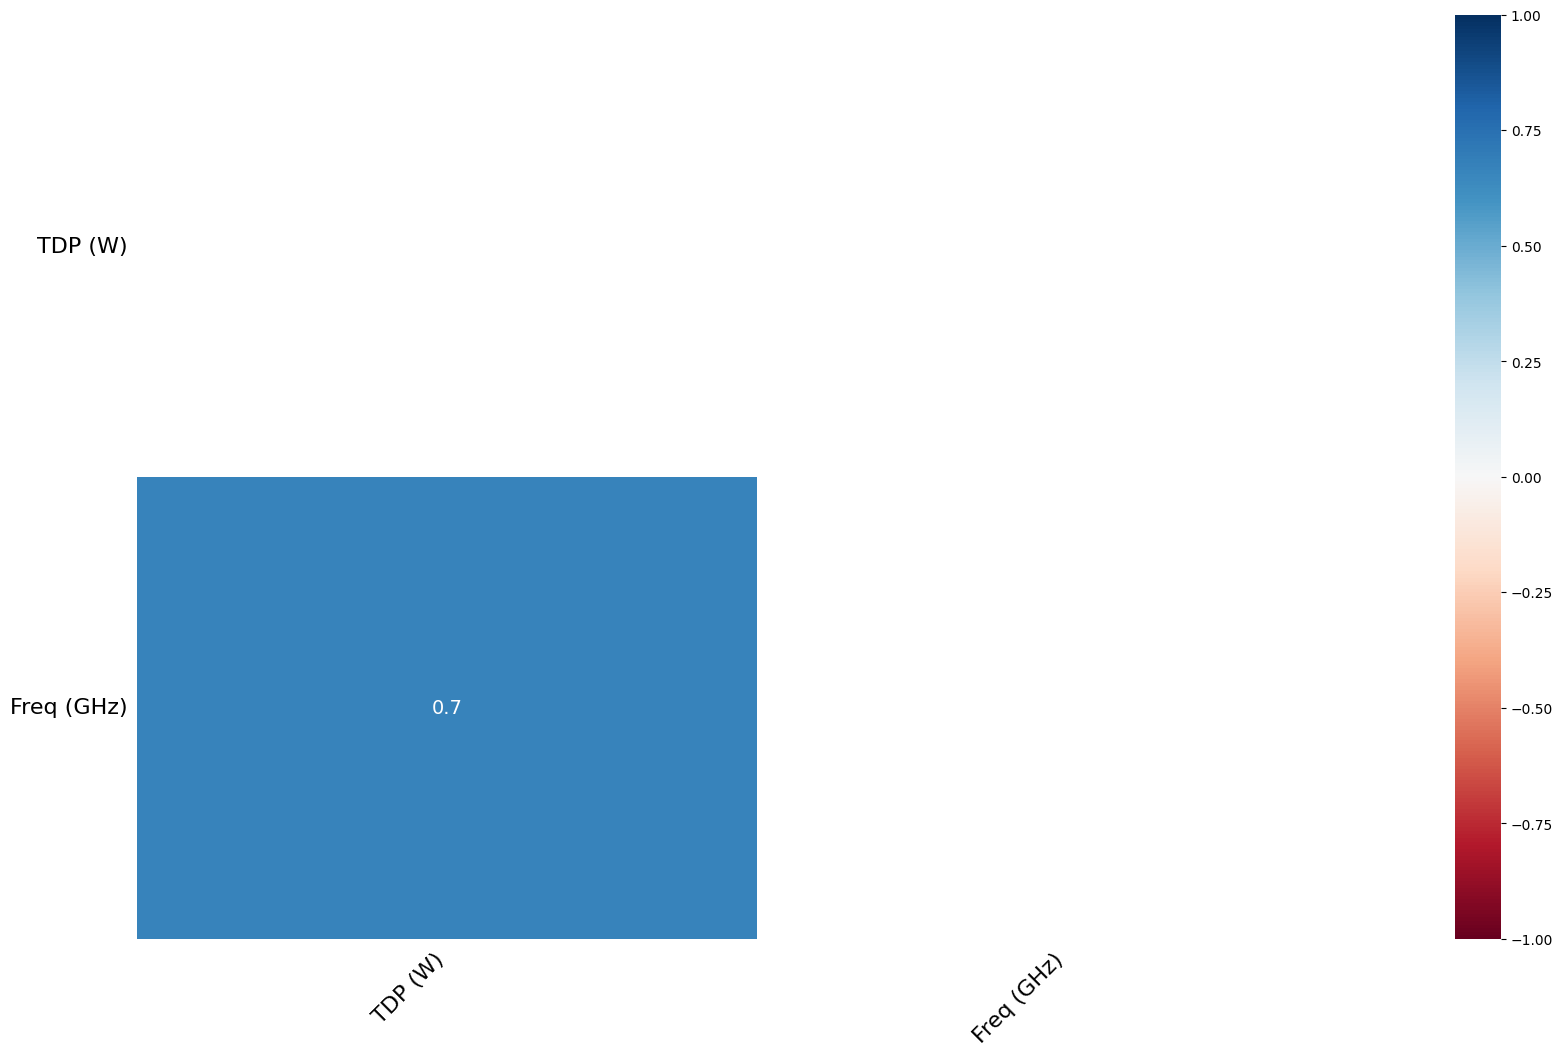

In [27]:
import missingno as msno

msno.matrix(tdf_freq)
msno.heatmap(tdf_freq)

Working on the foundry column I discovered some values were missing but it was the type missing not at random, I thought maybe some companies  did not want all their foundry to be known. So i used some domain knowledge after research.

In [28]:
df

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor
0,AMD Athlon 1000,CPU,2000-06-05,180,54.0,120.0,37.0,1000.0,NaN,AMD
1,AMD Athlon 1000,CPU,2000-10-31,180,54.0,120.0,37.0,1000.0,NaN,AMD
2,AMD Athlon 1100,CPU,2000-08-14,180,60.0,120.0,37.0,1100.0,NaN,AMD
3,AMD Athlon 1133,CPU,2000-10-31,180,63.0,120.0,37.0,1133.0,NaN,AMD
4,AMD Athlon 1200,CPU,2000-10-31,180,66.0,120.0,37.0,1200.0,NaN,AMD
...,...,...,...,...,...,...,...,...,...,...
4940,NVIDIA GeForce RTX 3050 6 GB,GPU,2024-01-08,8,80.0,200.0,8700.0,1042.0,Samsung,NVIDIA
4941,NVIDIA GeForce RTX 4070 SUPER,GPU,2024-01-08,5,220.0,294.0,35800.0,1980.0,TSMC,NVIDIA
4942,NVIDIA GeForce RTX 4070 Ti SUPER,GPU,2024-01-08,5,285.0,379.0,45900.0,2340.0,TSMC,NVIDIA
4943,NVIDIA GeForce RTX 4080 SUPER,GPU,2024-01-08,5,320.0,379.0,45900.0,2295.0,TSMC,NVIDIA


In [29]:
df['Foundry'].unique()

array([nan, 'Intel', 'TSMC', 'Fujitsu', 'GlobalFoundries', 'IBM', 'NEC',
       'UMC', 'Sony', 'Samsung', 'Renesas'], dtype=object)

In [30]:
df['Vendor'].unique()

array(['AMD', 'Intel', 'VIA', '3dfx', 'ATI', 'Matrox', 'NVIDIA', 'Sony',
       'XGI'], dtype=object)

In [31]:
df['Foundry'].value_counts()

Foundry
TSMC               2202
Intel              1444
GlobalFoundries     433
Samsung             132
UMC                  85
Sony                 18
Fujitsu               6
IBM                   4
NEC                   4
Renesas               2
Name: count, dtype: int64

In [32]:
df['Vendor'].value_counts()

Vendor
AMD       1689
Intel     1472
NVIDIA    1191
ATI        499
Matrox      26
XGI         21
3dfx        20
Sony        14
VIA         13
Name: count, dtype: int64

In [33]:
foundry_vendor = df[['Foundry', 'Vendor']]
foundry_vendor

,Foundry,Vendor
0,NaN,AMD
1,NaN,AMD
2,NaN,AMD
3,NaN,AMD
4,NaN,AMD
...,...,...
4940,Samsung,NVIDIA
4941,TSMC,NVIDIA
4942,TSMC,NVIDIA
4943,TSMC,NVIDIA


In [34]:
print(foundry_vendor.groupby('Vendor')['Foundry'].apply(lambda x:x.isna().sum()))

Vendor
3dfx        0
AMD       535
ATI        43
Intel       2
Matrox      0
NVIDIA     35
Sony        0
VIA         0
XGI         0
Name: Foundry, dtype: int64


In [35]:
ati = foundry_vendor[foundry_vendor['Vendor']=='ATI']
ati

,Foundry,Vendor
2247,TSMC,ATI
2248,TSMC,ATI
2249,IBM,ATI
2250,IBM,ATI
2251,IBM,ATI
...,...,...
3472,TSMC,ATI
3473,TSMC,ATI
3586,TSMC,ATI
3587,TSMC,ATI


In [36]:
df.describe()

,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz)
count,4945,4945.000000,4054.000000,4229.000000,4139.000000,4508.000000
mean,2012-10-02 05:40:42.467138304,50.862487,92.539714,212.972443,4836.373762,1615.430790
min,1999-03-15 00:00:00,0.000000,1.000000,6.000000,8.000000,100.000000
25%,2007-02-20 00:00:00,14.000000,35.000000,114.000000,163.500000,650.000000
50%,2012-10-02 00:00:00,28.000000,65.000000,169.000000,950.000000,1400.000000
75%,2018-08-03 00:00:00,80.000000,119.000000,257.000000,4050.000000,2500.000000
max,2024-01-08 00:00:00,250.000000,2400.000000,1280.000000,153000.000000,4700.000000
std,NaN,48.382904,97.469175,151.425313,12005.156903,1084.641452


In [37]:
def impute_foundry(df):
  # Mapping vendors to their corresponding foundries
  vendor_to_foundry = {
      'AMD' : 'TSMC',
      'ATI' : 'TSMC',
      'Intel' : 'Intel',
      'NVIDIA' : 'TSMC'
  }
  df['Foundry'] = df.apply(lambda row: vendor_to_foundry[row['Vendor']] if pd.isna(row['Foundry']) else row['Foundry'], axis=1)
  return foundry_vendor

df_imputed = impute_foundry(df)
print(df_imputed)

      Foundry  Vendor
0         NaN     AMD
1         NaN     AMD
2         NaN     AMD
3         NaN     AMD
4         NaN     AMD
...       ...     ...
4940  Samsung  NVIDIA
4941     TSMC  NVIDIA
4942     TSMC  NVIDIA
4943     TSMC  NVIDIA
4944     TSMC  NVIDIA

[4945 rows x 2 columns]


In [38]:
df_imputed.isna().sum()

Foundry    615
Vendor       0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Product                4945 non-null   object        
 1   Type                   4945 non-null   object        
 2   Release Date           4945 non-null   datetime64[ns]
 3   Process Size (nm)      4945 non-null   int64         
 4   TDP (W)                4054 non-null   float64       
 5   Die Size (mm^2)        4229 non-null   float64       
 6   Transistors (million)  4139 non-null   float64       
 7   Freq (GHz)             4508 non-null   float64       
 8   Foundry                4945 non-null   object        
 9   Vendor                 4945 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 386.5+ KB


In [40]:
df

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor
0,AMD Athlon 1000,CPU,2000-06-05,180,54.0,120.0,37.0,1000.0,TSMC,AMD
1,AMD Athlon 1000,CPU,2000-10-31,180,54.0,120.0,37.0,1000.0,TSMC,AMD
2,AMD Athlon 1100,CPU,2000-08-14,180,60.0,120.0,37.0,1100.0,TSMC,AMD
3,AMD Athlon 1133,CPU,2000-10-31,180,63.0,120.0,37.0,1133.0,TSMC,AMD
4,AMD Athlon 1200,CPU,2000-10-31,180,66.0,120.0,37.0,1200.0,TSMC,AMD
...,...,...,...,...,...,...,...,...,...,...
4940,NVIDIA GeForce RTX 3050 6 GB,GPU,2024-01-08,8,80.0,200.0,8700.0,1042.0,Samsung,NVIDIA
4941,NVIDIA GeForce RTX 4070 SUPER,GPU,2024-01-08,5,220.0,294.0,35800.0,1980.0,TSMC,NVIDIA
4942,NVIDIA GeForce RTX 4070 Ti SUPER,GPU,2024-01-08,5,285.0,379.0,45900.0,2340.0,TSMC,NVIDIA
4943,NVIDIA GeForce RTX 4080 SUPER,GPU,2024-01-08,5,320.0,379.0,45900.0,2295.0,TSMC,NVIDIA
